In [1]:
import cv2

In [2]:
import os
image_name=os.listdir(r'D:\project\images')

In [3]:
label=[]
for i in image_name:
    if i.split("_")[0]=='masked':
        label.append(0)
    if i.split("_")[0]=='unmasked':
        label.append(1)

In [4]:
#Labels
import numpy as np
Y=np.array(label)

In [5]:
loc=r'D:\project\images'

In [6]:
#features
features=[]
for i in os.listdir(loc):
 x=os.path.join(loc,i)
 f=cv2.imread(x,0)
 rf=cv2.resize(f,(50,50))
 features.append(rf)

In [7]:
X=np.array(features)/255

In [8]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.20)

In [10]:
import tensorflow as tf

In [11]:
model=tf.keras.models.Sequential()

In [12]:
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))

model.add(tf.keras.layers.Dense(3,activation='softmax'))

In [14]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [23]:
model.fit(xtrain,ytrain,epochs=5)

Epoch 1/5
21/21 [==============================] - 0s 249us/sample - loss: 0.2952 - acc: 0.9048
Epoch 2/5
21/21 [==============================] - 0s 800us/sample - loss: 0.2890 - acc: 0.9524
Epoch 3/5
21/21 [==============================] - 0s 287us/sample - loss: 0.2829 - acc: 0.9524
Epoch 4/5
21/21 [==============================] - 0s 728us/sample - loss: 0.2677 - acc: 0.9524
Epoch 5/5
21/21 [==============================] - 0s 892us/sample - loss: 0.2624 - acc: 0.9524


In [24]:
ypred=model.predict(xtest)

In [25]:
y_predicted=[]
for i in ypred:
    y_predicted.append(np.argmax(i))

In [26]:
(y_predicted==ytest).sum()/len(xtest)

0.8333333333333334

In [27]:
import matplotlib.pyplot as plt

Prediction of image unmasked


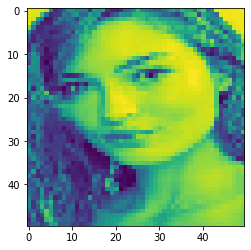

In [30]:
k=y_predicted[2]
if k==0:
    p='masked'
elif k==1:
    p='unmasked'

print('Prediction of image',p)
plt.imshow(xtest[2])
plt.show()

In [31]:
t=r'D:\project\Random data for prediction\masked.jfif'

In [32]:
ic=cv2.imread(t,0)
icr=cv2.resize(ic,(50,50))

Prediction of image masked


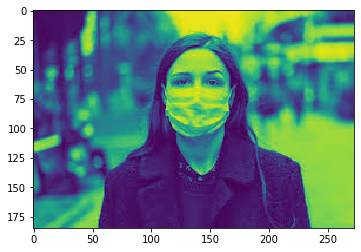

In [33]:
k=np.argmax(model.predict(icr.reshape(1,50,50)))
if k==0:
    p='masked'
elif k==1:
    p='unmasked'

print('Prediction of image',p)
plt.imshow(ic)
plt.show()

In [34]:
#using opencv

cv2.imshow(p,ic)
cv2.waitKey()
cv2.destroyAllWindows()